# Final Project: Facial Keypoints Detection

In this project, we'll investigate ...

In [25]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import csv
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

Load images and facial keypoints coordinates.

In [36]:
# function to load a file
def LoadFile(path): #'./Data/csvReadTest.csv'
    coordinates, faces = [], []
    with open(path) as csvfile:
        # read the file and separate image and keypoint coordinates
        facereader = csv.reader(csvfile, delimiter=',')
        for row in facereader:
            coordinates.append(row[0:-1])
            faces.append(row[-1])
        
    # first line is header, pop it out
    faces.pop(0)
    coor_names = coordinates.pop(0)
    # covert everything to number   
    for i in range(len(faces)):    
        faces[i]=[int(x) for x in faces[i].split(' ')]
        coordinates[i]=[float(x) if x else 0 for x in coordinates[i]]
       
    # convert to numpy array
    faces = np.array(faces)
    coordinates = np.array(coordinates)
    # return
    return faces, coordinates

# load test data file
test_faces, test_id = LoadFile('./Data/FKD_Test.csv')
print 'test data dimension: %s' %(str(test_faces.shape))
print 'test id dimension: %s' %(str(test_id.shape))

# load training data file, and separate it into training and dev data
train_faces, train_coordinates = LoadFile('./Data/FKD_Train.csv')
nTotal = train_faces.shape[0]
shuffle = np.random.permutation(np.arange(nTotal))
train_faces, train_coordinates = train_faces[shuffle], train_coordinates[shuffle]
# take 85% as training, 15% as dev 
nTrain = np.round(nTotal*.85)
dev_faces, dev_coordinates = train_faces[nTrain:], train_coordinates[nTrain:]
train_faces, train_coordinates = train_faces[1:nTrain], train_coordinates[1:nTrain]
print 'train data dimension: %s' %(str(train_faces.shape))
print 'train coordinates dimension: %s' %(str(train_coordinates.shape))
print 'dev data dimension: %s' %(str(dev_faces.shape))
print 'dev coordinates dimension: %s' %(str(dev_coordinates.shape))


test data dimension: (1783L, 9216L)
test id dimension: (1783L, 1L)
train data dimension: (5991L, 9216L)
train coordinates dimension: (5991L, 30L)
dev data dimension: (1057L, 9216L)
dev coordinates dimension: (1057L, 30L)


Test

range: 11 ~ 212


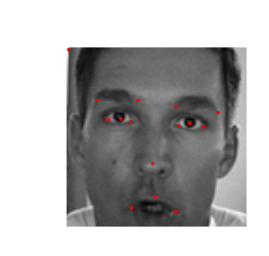

In [35]:
# print a picture to see
i = 210 #1733 #210 is an example that some coordinates are missing
plt.imshow(np.reshape(train_faces[i],(96,96)), cmap = cm.gray)
plt.axis('off')
fkp = train_coordinates[i]
for i in range(len(fkp)/2):
    plt.plot(fkp[2*i],fkp[2*i+1],'r.')
print 'range: %d ~ %d' %(min(train_faces[i]), max(train_faces[i]))

In [24]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
